In [1]:
## Important Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read CSV
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
## Top Five Features of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
## Bottom Five Features of the dataset
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
## Shape of the dataset
df.shape

(5110, 12)

In [6]:
## Columns of the dataset
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
## Unique values present in each column
for i in df.columns:
    print(i,'\n')
    print(df[i].unique(),'\n')
    print('*'*50)

id 

[ 9046 51676 31112 ... 19723 37544 44679] 

**************************************************
gender 

['Male' 'Female' 'Other'] 

**************************************************
age 

[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.

In [8]:
## Value count of each unique value in each column
for i in df.columns:
    print(i,'\n')
    print(df[i].value_counts(),'\n')
    print('*'*50)

id 

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64 

**************************************************
gender 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

**************************************************
age 

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64 

**************************************************
hypertension 

0    4612
1     498
Name: hypertension, dtype: int64 

**************************************************
heart_disease 

0    4834
1     276
Name: heart_disease, dtype: int64 

**************************************************
ever_married 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

**************************************************
work_type 

Private          2925
Self-emp

## Insights
Only one datapoint have gender others so that it is not useful for any type of prediction. 

In [9]:
## Drop Other
df.drop(index=df[df['gender']=='Other'].index,axis=0,inplace=True)
df=df.reset_index()
df.drop('index',axis=1,inplace=True)

## Important Observation
Id column does not impact on the output feature so in next step we will going to remove this feature.

In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
## Description about the numerical features
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


## Insights
From the output of the above code we got the insights about the various statistics measurement of the numerical feature.

In [12]:
## Null value check
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Insights
From the output of the above code we got the insight that 201 datapoints are missing in bmi column.

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


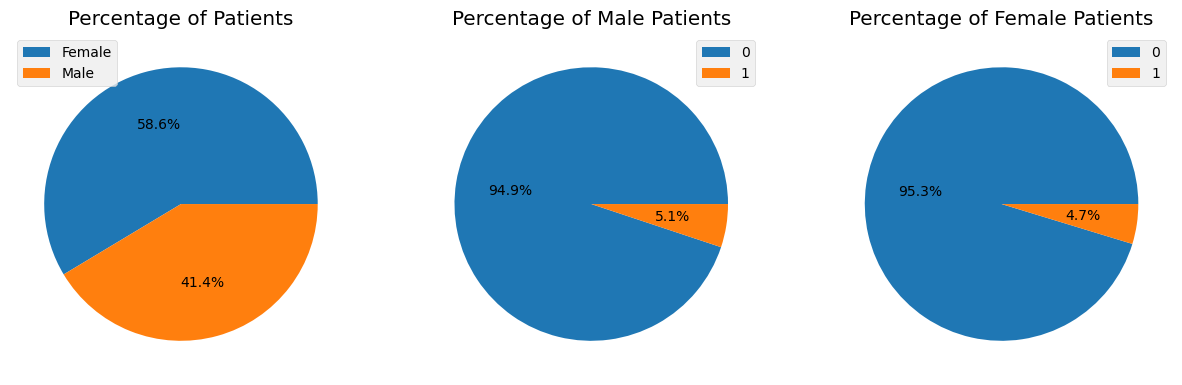

In [14]:
## Piecharts of Patients
fig,ax=plt.subplots(1,3,figsize=(15,20))
plt.style.use('bmh')
ax[0].set_title("Percentage of Patients")
ax[0].pie(df['gender'].value_counts(),
          autopct='%1.1f%%')
ax[0].legend(labels=df['gender'].value_counts().index)
ax[1].set_title("Percentage of Male Patients")
ax[1].pie(df[df['gender']=='Male']['stroke'].value_counts(),
        autopct='%1.1f%%')
ax[1].legend(labels=df[df['gender']=='Male']['stroke'].value_counts().index)
ax[2].set_title("Percentage of Female Patients")
ax[2].pie(df[df['gender']=='Female']['stroke'].value_counts(),
          autopct='%1.1f%%')
ax[2].legend(labels=df[df['gender']=='Female']['stroke'].value_counts().index)
plt.show()

## Insights
1. Out of total patients 58.6% are female and reset are male.
2. Out of total male patients 94.9% did not face any stroke but remaining 5.1% faced the stroke.
3. Out of total female patients 95.3% did not face any stroke but remaining 4.7% faced the stroke.

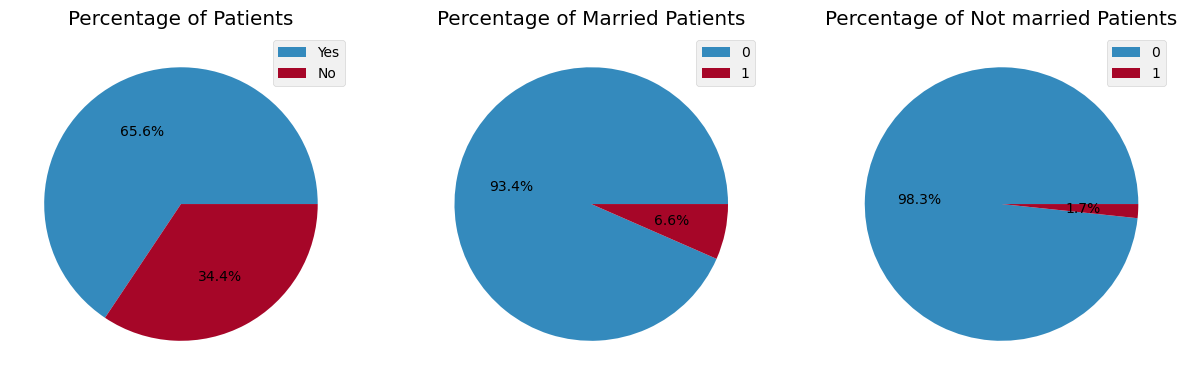

In [15]:
## Piecharts of Patients
fig,ax=plt.subplots(1,3,figsize=(15,20))
plt.style.use("bmh")
ax[0].set_title("Percentage of Patients")
ax[0].pie(df['ever_married'].value_counts(),
          autopct='%1.1f%%')
ax[0].legend(labels=df['ever_married'].value_counts().index)
ax[1].set_title("Percentage of Married Patients")
ax[1].pie(df[df['ever_married']=='Yes']['stroke'].value_counts(),
        autopct='%1.1f%%')
ax[1].legend(labels=df[df['ever_married']=='Yes']['stroke'].value_counts().index)
ax[2].set_title("Percentage of Not married Patients")
ax[2].pie(df[df['ever_married']=='No']['stroke'].value_counts(),
          autopct='%1.1f%%')
ax[2].legend(labels=df[df['ever_married']=='No']['stroke'].value_counts().index)
plt.show()

## Insights
1. Out of total patients 65.6% are married and reset are unmarried.
2. Out of total married patients 93.4% did not face any stroke but remaining 6.6% faced the stroke.
3. Out of total unmarried patients 98.3% did not face any stroke but remaining 1.7% faced the stroke.
4. Married patient got more stroke than unmarried patients.

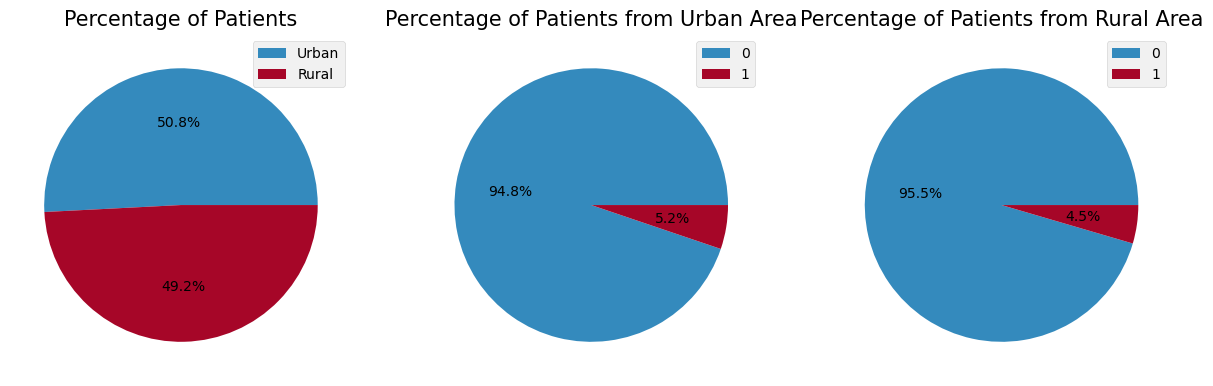

In [16]:
## Piecharts of Patients
fig,ax=plt.subplots(1,3,figsize=(15,20))
plt.style.use("bmh")
ax[0].set_title("Percentage of Patients",fontsize=15)
ax[0].pie(df['Residence_type'].value_counts(),
          autopct='%1.1f%%')
ax[0].legend(labels=df['Residence_type'].value_counts().index)
ax[1].set_title("Percentage of Patients from Urban Area",fontsize=15)
ax[1].pie(df[df['Residence_type']=='Urban']['stroke'].value_counts(),
        autopct='%1.1f%%')
ax[1].legend(labels=df[df['Residence_type']=='Urban']['stroke'].value_counts().index)
ax[2].set_title("Percentage of Patients from Rural Area",fontsize=15)
ax[2].pie(df[df['Residence_type']=='Rural']['stroke'].value_counts(),
          autopct='%1.1f%%')
ax[2].legend(labels=df[df['Residence_type']=='Rural']['stroke'].value_counts().index)
plt.show()

## Insights
1. Out of total patients from Urban 50.8% and reset are from Rural.
2. Out of total patients from Urban 94.8% did not face any stroke but remaining 5.2% faced the stroke.
3. Out of total patients from Rural 95.5% did not face any stroke but remaining 4.5% faced the stroke.
4. Patients from Urban got more stroke than those of Rural.

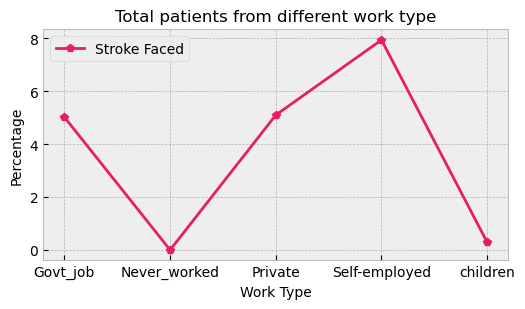

In [17]:
## Line chart of total patients and their work_type
y=df['work_type'].value_counts()
y1=df[df['stroke']==1]['work_type'].value_counts()
y2=round((y1/y)*100,2).fillna(0.0)
plt.style.use("bmh")
plt.figure(figsize=(6,3))
plt.title('Total patients from different work type',fontsize=12)
plt.plot(y2,marker='p',color='#E61E64')
plt.xlabel("Work Type")
plt.ylabel("Percentage")
plt.legend(['Stroke Faced','Not Stroke Faced'])
plt.show()

## Insights
1. Self-employed got maximum strokes.
2. Patients those never worked got minimum strokes.

In [18]:
x=df['smoking_status'].mode()
df['smoking_status'].replace({'Unknown':x[0]},inplace=True)

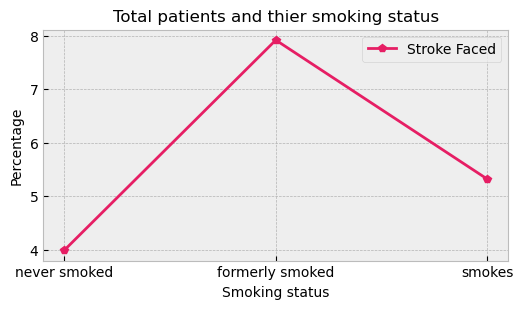

In [19]:
## Line chart of total patient and their smoking status
y=df['smoking_status'].value_counts()
y1=df[df['stroke']==1]['smoking_status'].value_counts()
y2=round((y1/y)*100,2).fillna(0.0)
plt.style.use("bmh")
plt.figure(figsize=(6,3))
plt.title('Total patients and thier smoking status',fontsize=12)
plt.plot(y2,marker='p',color='#E61E64')
plt.xlabel("Smoking status")
plt.ylabel("Percentage")
plt.legend(['Stroke Faced','Not Stroke Faced'])
plt.show()

## Insights
1. Patients those are formerly smokers got maximum strokes.
2. Patients those are not smoker any time got minimum strokes.

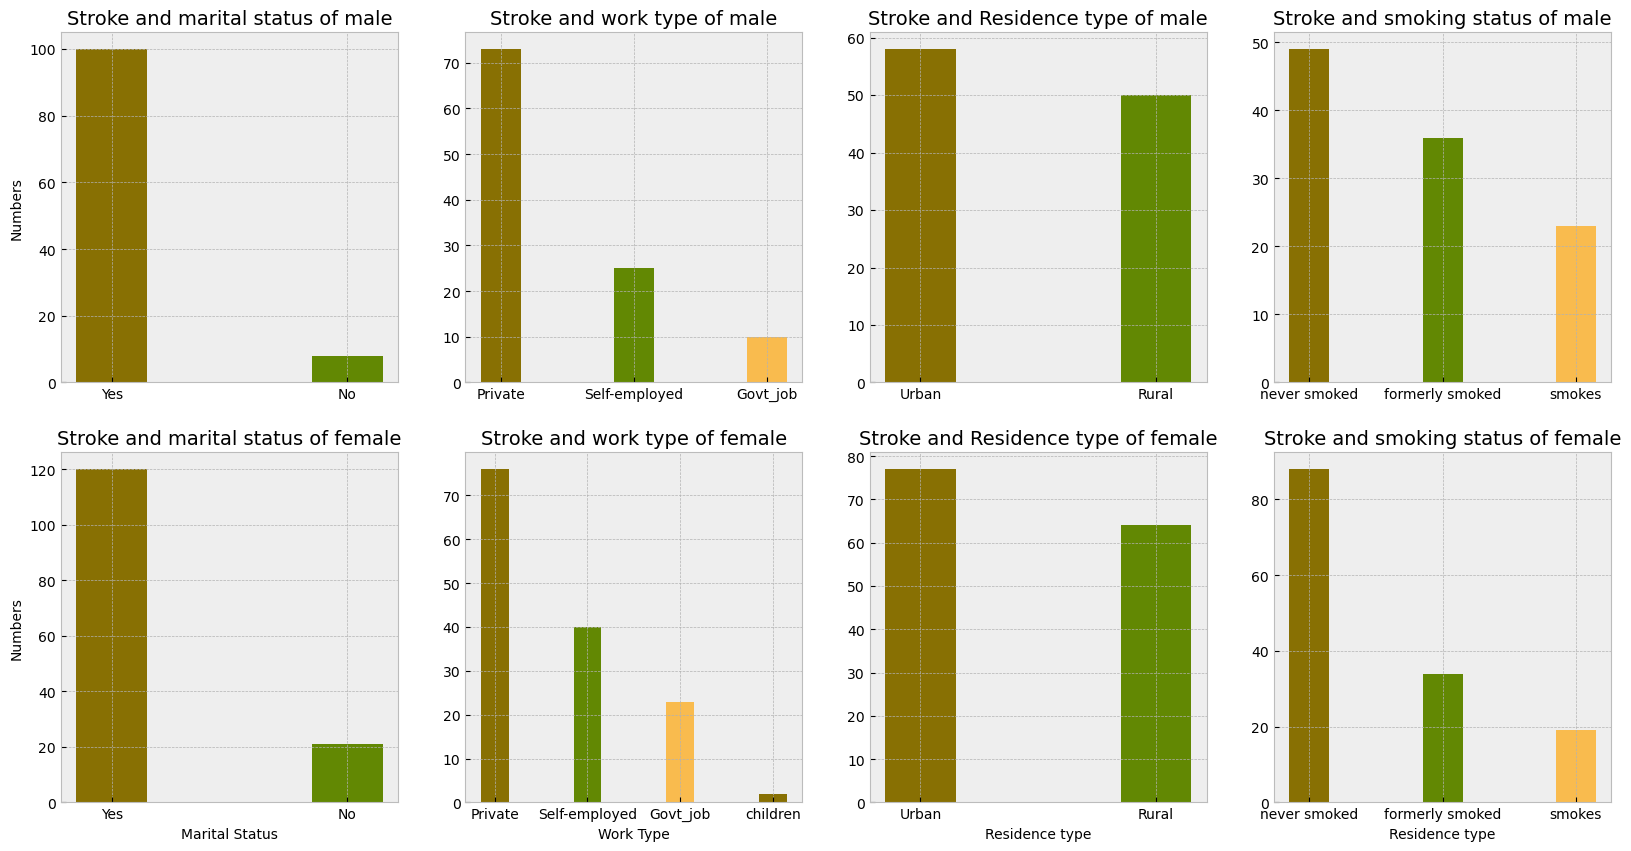

In [20]:
## Bargraphs of gender stroke conditions
df_male=df[df['gender']=='Male'][['ever_married',
                                  'work_type',
                                  'Residence_type',
                                  'smoking_status',
                                  'stroke']].reset_index(drop=True)
df_female=df[df['gender']=='Female'][['ever_married',
                                      'work_type',
                                      'Residence_type',
                                      'smoking_status',
                                      'stroke']].reset_index(drop=True)
fig,ax=plt.subplots(2,4,figsize=(20,10))
plt.style.use("bmh")
ax[0][0].set_title("Stroke and marital status of male",fontsize=14)
ax[0][0].bar(x=df_male[df_male['stroke']==1]['ever_married'].value_counts().index,
        height=df_male[df_male['stroke']==1]['ever_married'].value_counts(),
             width=0.3,color=['#887003','#628803','#F9BB4E'])
ax[0][0].set_ylabel("Numbers")
ax[0][1].set_title("Stroke and work type of male",fontsize=14)
ax[0][1].bar(x=df_male[df_male['stroke']==1]['work_type'].value_counts().index,
        height=df_male[df_male['stroke']==1]['work_type'].value_counts(),
             width=0.3,color=['#887003','#628803','#F9BB4E'])
ax[0][2].set_title("Stroke and Residence type of male",fontsize=14)
ax[0][2].bar(x=df_male[df_male['stroke']==1]['Residence_type'].value_counts().index,
        height=df_male[df_male['stroke']==1]['Residence_type'].value_counts(),
             width=0.3,color=['#887003','#628803','#F9BB4E'])
ax[0][3].set_title("Stroke and smoking status of male",fontsize=14)
ax[0][3].bar(x=df_male[df_male['stroke']==1]['smoking_status'].value_counts().index,
        height=df_male[df_male['stroke']==1]['smoking_status'].value_counts(),
             width=0.3,color=['#887003','#628803','#F9BB4E'])
ax[1][0].set_title("Stroke and marital status of female",fontsize=14)
ax[1][0].bar(x=df_female[df_female['stroke']==1]['ever_married'].value_counts().index,
        height=df_female[df_female['stroke']==1]['ever_married'].value_counts(),
             width=0.3,color=['#887003','#628803','#F9BB4E'])
ax[1][0].set_xlabel("Marital Status")
ax[1][0].set_ylabel("Numbers")
ax[1][1].set_title("Stroke and work type of female",fontsize=14)
ax[1][1].bar(x=df_female[df_female['stroke']==1]['work_type'].value_counts().index,
        height=df_female[df_female['stroke']==1]['work_type'].value_counts(),
             width=0.3,color=['#887003','#628803','#F9BB4E'])
ax[1][1].set_xlabel("Work Type")
ax[1][2].set_title("Stroke and Residence type of female",fontsize=14)
ax[1][2].bar(x=df_female[df_female['stroke']==1]['Residence_type'].value_counts().index,
        height=df_female[df_female['stroke']==1]['Residence_type'].value_counts(),
             width=0.3,color=['#887003','#628803','#F9BB4E'])
ax[1][2].set_xlabel("Residence type")
ax[1][3].set_title("Stroke and smoking status of female",fontsize=14)
ax[1][3].bar(x=df_female[df_female['stroke']==1]['smoking_status'].value_counts().index,
        height=df_female[df_female['stroke']==1]['smoking_status'].value_counts(),
             width=0.3,color=['#887003','#628803','#F9BB4E'])
ax[1][3].set_xlabel("Residence type")
plt.show()

In [21]:
## Independent and dependent variables
X=df.drop('stroke',axis=1)
y=df['stroke']

In [22]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
num_features=X_train.dtypes[X_train.dtypes!='object'].index
cat_features=X_train.dtypes[X_train.dtypes=='object'].index

In [24]:
## Pipeline Creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
from sklearn.impute import SimpleImputer ## Handling missing values
from sklearn.preprocessing import OneHotEncoder ## Handling Categorical features
from sklearn.preprocessing import StandardScaler ## Feature scaling

In [26]:
## Feature Engineering Automation
num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')), ## missing values
    ('scaler',StandardScaler()) ##feature scaling
])
cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')), ## missing values
    ('encoder',OneHotEncoder()) ##Categorical to numerical
    
])                      

In [27]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)
])

In [28]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [29]:
X_train

array([[-0.84538223, -0.31708961, -0.23531235, ...,  0.        ,
         1.        ,  0.        ],
       [-0.09386659, -0.31708961, -0.23531235, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.39240824, -0.31708961, -0.23531235, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.8550656 , -0.31708961, -0.23531235, ...,  0.        ,
         1.        ,  0.        ],
       [-0.22648699, -0.31708961, -0.23531235, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.12716743, -0.31708961, -0.23531235, ...,  0.        ,
         0.        ,  1.        ]])

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [31]:
## Automate Model Training Process
models={
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVC':SVC()

}

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            

            
    return report

In [34]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.9381846635367762,
 'Decision Tree': 0.9100156494522692,
 'SVC': 0.9374021909233177}

## Final Conclusion
1. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.
2. In this ML model I got 93.81% accuracy from Random Forest Classifier.
3. In this ML model I got 91.00% accuracy from Decision Tree Classifier.
4. In this ML model I got 93.74% accuracy from Support Vector Classifier.